In [1]:

import os
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Try preferred profiling packages (ydata_profiling or pandas_profiling)
profile_pkg = None
try:
    import ydata_profiling as ydp
    profile_pkg = 'ydata_profiling'
except Exception:
    try:
        import pandas_profiling as pdp
        profile_pkg = 'pandas_profiling'
    except Exception:
        profile_pkg = None

print('Profiling package available:', profile_pkg)

c:\Users\josek\Desktop\ProyectosPersonales\TGR-C-1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Profiling package available: None


In [2]:
repo_root = Path('..').resolve()  # notebook is in src/, repo root is parent
data_file = repo_root / 'data' / 'barber-motorsports-park' / 'barber' / 'R1_barber_telemetry_data.csv'

In [3]:
df = pd.read_csv(data_file)

In [4]:
df = df[df['vehicle_id'] == 'GR86-002-000']

# Restructured Telemetry Data

Converting the data from long format (one row per measurement) to wide format (one row per timestamp, with measurements as columns). This makes it easier to analyze relationships between different measurements at each point in time.

In [7]:
# Convert meta_time to datetime if it's not already
df['meta_time'] = pd.to_datetime(df['meta_time'])

# Create a pivot table including lap information
df_wide = df.pivot_table(
    index=['meta_time', 'lap'],  # Include lap in the index
    columns='telemetry_name',
    values='telemetry_value',
    aggfunc='mean'  # Using mean for duplicate timestamps
).reset_index()

# Sort by timestamp
df_wide = df_wide.sort_values('meta_time')

# Show the first few rows and info about the new structure
print("\nNew dataframe structure:")
print("Shape:", df_wide.shape)
print("\nColumns:", df_wide.columns.tolist())
print("\nFirst few rows:")
display(df_wide.head())

# Show some basic statistics for each measurement
print("\nBasic statistics for each measurement (excluding meta_time and lap):")
numeric_cols = df_wide.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col != 'lap']  # Exclude lap from statistics
display(df_wide[numeric_cols].describe())


New dataframe structure:
Shape: (9627, 14)

Columns: ['meta_time', 'lap', 'Laptrigger_lapdist_dls', 'Steering_Angle', 'VBOX_Lat_Min', 'VBOX_Long_Minutes', 'accx_can', 'accy_can', 'aps', 'gear', 'nmot', 'pbrake_f', 'pbrake_r', 'speed']

First few rows:


telemetry_name,meta_time,lap,Laptrigger_lapdist_dls,Steering_Angle,VBOX_Lat_Min,VBOX_Long_Minutes,accx_can,accy_can,aps,gear,nmot,pbrake_f,pbrake_r,speed
0,2025-09-06 18:40:01.639000+00:00,2,2627.0,3.900000,33.530491,-86.620529,0.030429,0.004571,14.002857,2.0,6167.000000,0.0,0.0,106.150
1,2025-09-06 18:40:01.640000+00:00,2,2636.0,8.160000,33.530454,-86.620629,0.046500,0.060300,13.980000,2.0,6025.000000,0.0,0.0,106.160
2,2025-09-06 18:40:01.641000+00:00,2,2651.0,17.254545,33.530403,-86.620762,0.042636,0.268273,14.125455,2.0,6078.333333,0.0,0.0,107.015
3,2025-09-06 18:40:01.642000+00:00,2,2672.0,26.425000,33.530345,-86.620907,0.037083,0.506417,14.025000,2.0,6146.000000,0.0,0.0,107.515
4,2025-09-06 18:40:01.644000+00:00,2,NaN,27.700000,33.530312,-86.620979,0.025000,0.555000,13.560000,2.0,NaN,0.0,0.0,107.940



Basic statistics for each measurement (excluding meta_time and lap):


telemetry_name,Laptrigger_lapdist_dls,Steering_Angle,VBOX_Lat_Min,VBOX_Long_Minutes,accx_can,accy_can,aps,gear,nmot,pbrake_f,pbrake_r,speed
count,6819.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,6819.000000,9418.000000,9418.000000,6800.000000
mean,1825.524138,-3.930179,33.532532,-86.619082,0.008835,-0.201315,68.818233,2.737351,6372.466112,7.182376,7.262916,130.493955
std,1066.538721,37.200965,0.001817,0.002672,0.344400,0.801277,42.370324,1.000521,575.497347,24.026143,24.209582,29.592238
min,0.000000,-123.320000,33.529331,-86.624306,-1.530200,-1.844000,0.000000,1.000000,3848.000000,0.000000,0.000000,64.700000
25%,901.000000,-26.100000,33.531161,-86.621008,-0.016750,-0.942810,16.182478,2.000000,6118.000000,0.000000,0.000000,105.137500
50%,1808.000000,1.700000,33.532373,-86.618540,0.134000,-0.096500,100.000000,3.000000,6477.500000,0.000000,0.000000,134.545000
75%,2815.750000,11.913235,33.534091,-86.617143,0.191000,0.233667,100.000000,4.000000,6766.000000,0.000000,0.000000,154.762500
max,3715.000000,220.050000,33.535892,-86.614532,0.621000,1.799400,100.000000,4.000000,7358.000000,169.946111,170.771389,186.720000


## Car Path Visualization with Centered Steering Angle

Plotting the car's path using VBOX latitude and longitude data, with steering angle color centered at 0 (red for left turns, blue for right turns).

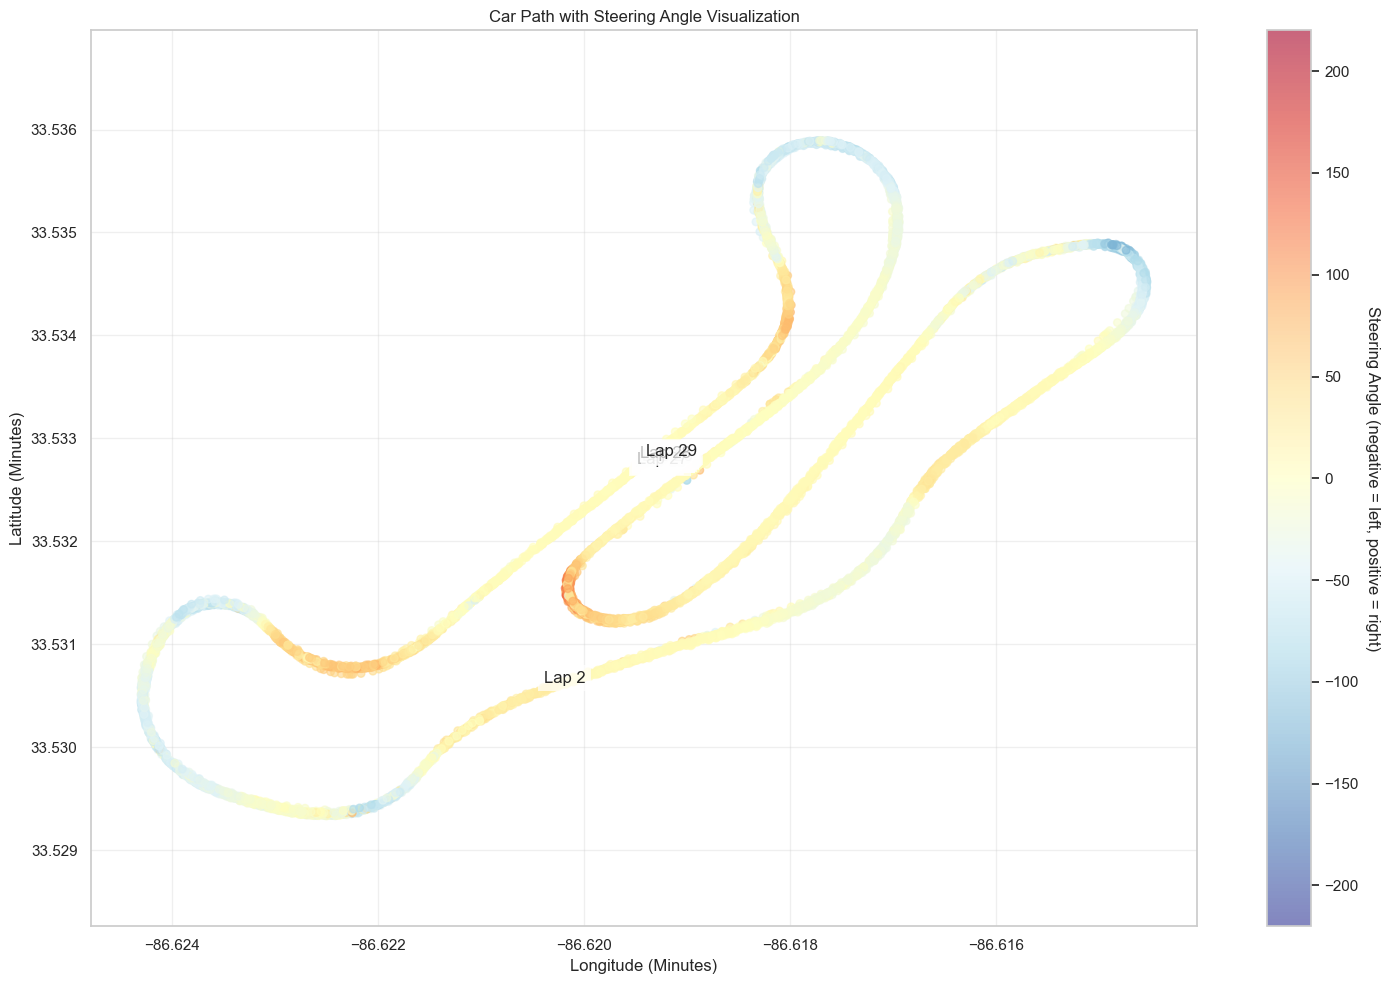

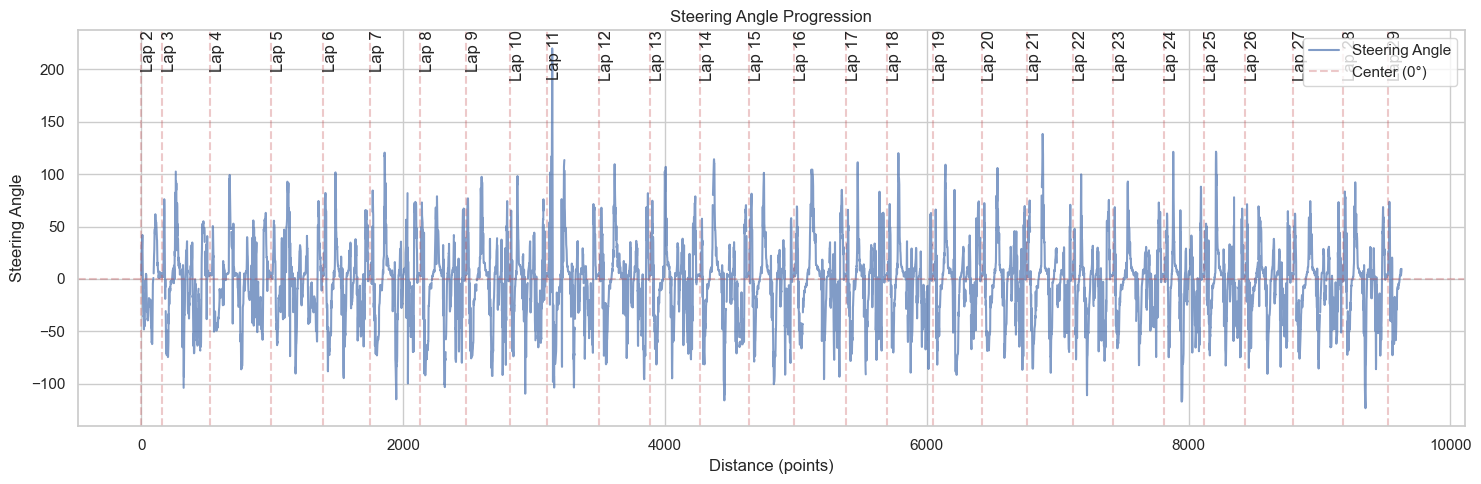


Steering Angle Statistics Across All Laps:
Mean steering angle: -3.93
Standard deviation: 37.20
Min (maximum left): -123.32
Max (maximum right): 220.05
Time spent turning left: 46.8%
Time spent turning right: 51.0%
Time straight (±1 degree): 1.9%


In [8]:
# Calculate the maximum absolute steering angle for symmetric color range
max_abs_steering = max(abs(df_wide['Steering_Angle'].min()), 
                      abs(df_wide['Steering_Angle'].max()))

# Create scatter plot of car's path with steering angle
plt.figure(figsize=(15, 10))

# Create scatter plot with steering angle as color, centered at 0
scatter = plt.scatter(df_wide['VBOX_Long_Minutes'], 
                     df_wide['VBOX_Lat_Min'],
                     c=df_wide['Steering_Angle'],
                     cmap='RdYlBu_r',  # Red-Yellow-Blue colormap (red for left, blue for right)
                     s=30,  # Point size
                     alpha=0.6,
                     vmin=-max_abs_steering,  # Set color range symmetrically
                     vmax=max_abs_steering)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Steering Angle (negative = left, positive = right)', rotation=270, labelpad=15)

# Customize plot
plt.title('Car Path with Steering Angle Visualization')
plt.xlabel('Longitude (Minutes)')
plt.ylabel('Latitude (Minutes)')
plt.grid(True, alpha=0.3)

# Add lap numbers at the start of each lap
for lap_num in df_wide['lap'].unique():
    if lap_num >= 0:  # Skip pre-lap data
        lap_start = df_wide[df_wide['lap'] == lap_num].iloc[0]
        plt.annotate(f'Lap {int(lap_num)}', 
                    (lap_start['VBOX_Long_Minutes'], lap_start['VBOX_Lat_Min']),
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Equal aspect ratio to prevent distortion
plt.axis('equal')
plt.tight_layout()
plt.show()

# Show steering angle progression
plt.figure(figsize=(15, 5))
plt.plot(range(len(df_wide)), df_wide['Steering_Angle'], 
         label='Steering Angle', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3, label='Center (0°)')

# Add lap markers
for lap_num in df_wide['lap'].unique():
    if lap_num >= 0:
        lap_start_idx = df_wide[df_wide['lap'] == lap_num].index[0]
        plt.axvline(x=lap_start_idx, color='r', linestyle='--', alpha=0.3)
        plt.text(lap_start_idx, plt.ylim()[1], f'Lap {int(lap_num)}',
                rotation=90, verticalalignment='top')

plt.title('Steering Angle Progression')
plt.xlabel('Distance (points)')
plt.ylabel('Steering Angle')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print overall steering angle statistics
print("\nSteering Angle Statistics Across All Laps:")
stats = df_wide['Steering_Angle'].describe()
print(f"Mean steering angle: {stats['mean']:.2f}")
print(f"Standard deviation: {stats['std']:.2f}")
print(f"Min (maximum left): {stats['min']:.2f}")
print(f"Max (maximum right): {stats['max']:.2f}")
print(f"Time spent turning left: {(df_wide['Steering_Angle'] < 0).mean()*100:.1f}%")
print(f"Time spent turning right: {(df_wide['Steering_Angle'] > 0).mean()*100:.1f}%")
print(f"Time straight (±1 degree): {(abs(df_wide['Steering_Angle']) <= 1).mean()*100:.1f}%")

# Predicting Steer Angle with KNN

In [17]:
df_wide.head()

telemetry_name,meta_time,lap,Laptrigger_lapdist_dls,Steering_Angle,VBOX_Lat_Min,VBOX_Long_Minutes,accx_can,accy_can,aps,gear,nmot,pbrake_f,pbrake_r,speed
0,2025-09-06 18:40:01.639000+00:00,2,2627.0,3.900000,33.530491,-86.620529,0.030429,0.004571,14.002857,2.0,6167.000000,0.0,0.0,106.150
1,2025-09-06 18:40:01.640000+00:00,2,2636.0,8.160000,33.530454,-86.620629,0.046500,0.060300,13.980000,2.0,6025.000000,0.0,0.0,106.160
2,2025-09-06 18:40:01.641000+00:00,2,2651.0,17.254545,33.530403,-86.620762,0.042636,0.268273,14.125455,2.0,6078.333333,0.0,0.0,107.015
3,2025-09-06 18:40:01.642000+00:00,2,2672.0,26.425000,33.530345,-86.620907,0.037083,0.506417,14.025000,2.0,6146.000000,0.0,0.0,107.515
4,2025-09-06 18:40:01.644000+00:00,2,NaN,27.700000,33.530312,-86.620979,0.025000,0.555000,13.560000,2.0,NaN,0.0,0.0,107.940


In [ ]:
laps = df_wide.lap.unique()

will try to predict laps 28 & 29 by using laps 2 to 27

In [18]:
df_train = df_wide[df_wide.lap.isin(range(2, 28))]

In [19]:
df_test = df_wide[df_wide.lap.isin([28, 29])]

In [34]:
# Define key columns
key_columns = ['VBOX_Lat_Min', 'VBOX_Long_Minutes', 'Steering_Angle']

# Print original sizes
print("Original sizes:")
print(f"df_wide: {len(df_wide)} rows")
print(f"df_train: {len(df_train)} rows")
print(f"df_test: {len(df_test)} rows")

# Remove rows with NaN values in key columns
df_wide_clean = df_wide.dropna(subset=key_columns)
df_train_clean = df_train.dropna(subset=key_columns)
df_test_clean = df_test.dropna(subset=key_columns)

# Print new sizes and number of rows removed
print("\nAfter removing NaN rows:")
print(f"df_wide_clean: {len(df_wide_clean)} rows ({len(df_wide) - len(df_wide_clean)} rows removed)")
print(f"df_train_clean: {len(df_train_clean)} rows ({len(df_train) - len(df_train_clean)} rows removed)")
print(f"df_test_clean: {len(df_test_clean)} rows ({len(df_test) - len(df_test_clean)} rows removed)")

# Verify no NaN values remain in key columns
print("\nVerifying no NaN values remain:")
for df_name, df in [("df_wide_clean", df_wide_clean), 
                    ("df_train_clean", df_train_clean), 
                    ("df_test_clean", df_test_clean)]:
    nan_counts = df[key_columns].isna().sum()
    print(f"\n{df_name} NaN counts:")
    print(nan_counts)

Original sizes:
df_wide: 9627 rows
df_train: 9177 rows
df_test: 450 rows

After removing NaN rows:
df_wide_clean: 9418 rows (209 rows removed)
df_train_clean: 8980 rows (197 rows removed)
df_test_clean: 438 rows (12 rows removed)

Verifying no NaN values remain:

df_wide_clean NaN counts:
telemetry_name
VBOX_Lat_Min         0
VBOX_Long_Minutes    0
Steering_Angle       0
dtype: int64

df_train_clean NaN counts:
telemetry_name
VBOX_Lat_Min         0
VBOX_Long_Minutes    0
Steering_Angle       0
dtype: int64

df_test_clean NaN counts:
telemetry_name
VBOX_Lat_Min         0
VBOX_Long_Minutes    0
Steering_Angle       0
dtype: int64


In [43]:
df_wide = df_wide_clean
df_train = df_train_clean
df_test = df_test_clean

In [74]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

def test_knn(df_train = df_train, df_test = df_test, k_values = [5]):
    # Define feature columns (excluding target)
    feature_columns = ['VBOX_Lat_Min', 'VBOX_Long_Minutes']
    
    # Prepare X and y for training
    X_train = df_train[feature_columns]
    y_train = df_train['Steering_Angle']
    
    # Prepare X for testing
    X_test = df_test[feature_columns]
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    metrics_list = []
    
    for k in k_values:
        # Initialize and train KNN regressor
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        
        # Make predictions on test set
        predictions = knn.predict(X_test_scaled)
        
        # Add predictions to test dataframe
        df_test['pred_steering_angle'] = predictions
        
        # Create metrics dictionary for this k value
        mse = mean_squared_error(df_test['Steering_Angle'], df_test['pred_steering_angle'])
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(df_test['Steering_Angle'], df_test['pred_steering_angle'])
        metrics_dict = {
            'k': k,
            'mse': np.mean(predictions),
            'std_pred': np.std(predictions),
            'min_pred': np.min(predictions),
            'max_pred': np.max(predictions),
            'mse': mse,
            'rmse': rmse,
            'mae': mae
        }
        metrics_list.append(metrics_dict)
    
    # Convert list of dictionaries to DataFrame
    df_metrics = pd.DataFrame(metrics_list)
        
    return df_metrics

In [75]:
metrics = test_knn(df_train, df_test, k_values = range(5, 1000))

In [77]:
metrics

,k,mse,std_pred,min_pred,max_pred,rmse,mae
0,5,197.870428,36.483434,-95.670000,94.200466,14.066642,8.253408
1,6,190.851714,36.351581,-95.491667,94.142055,13.814909,8.122501
2,7,197.643234,36.252043,-93.608333,94.768190,14.058564,8.074619
3,8,185.688133,36.055469,-92.344352,92.109939,13.626743,8.002043
4,9,188.988211,36.010569,-94.186190,93.132331,13.747298,8.109913
...,...,...,...,...,...,...,...
990,995,638.342558,23.402641,-40.616064,40.685210,25.265442,17.847341
991,996,638.913432,23.389899,-40.592275,40.698578,25.276737,17.855643
992,997,639.462739,23.376899,-40.563744,40.704765,25.287600,17.865007
993,998,639.890000,23.363216,-40.534622,40.717373,25.296047,17.870939


In [93]:
best_k = metrics.loc[metrics['mse'].idxmin()].k
print(f"Best k (min MSE): {best_k}")

Best k (min MSE): 32.0


Prediction Statistics:
Mean predicted steering angle: -4.51
Min predicted steering angle: -90.73
Max predicted steering angle: 89.90


<Figure size 1500x1000 with 0 Axes>

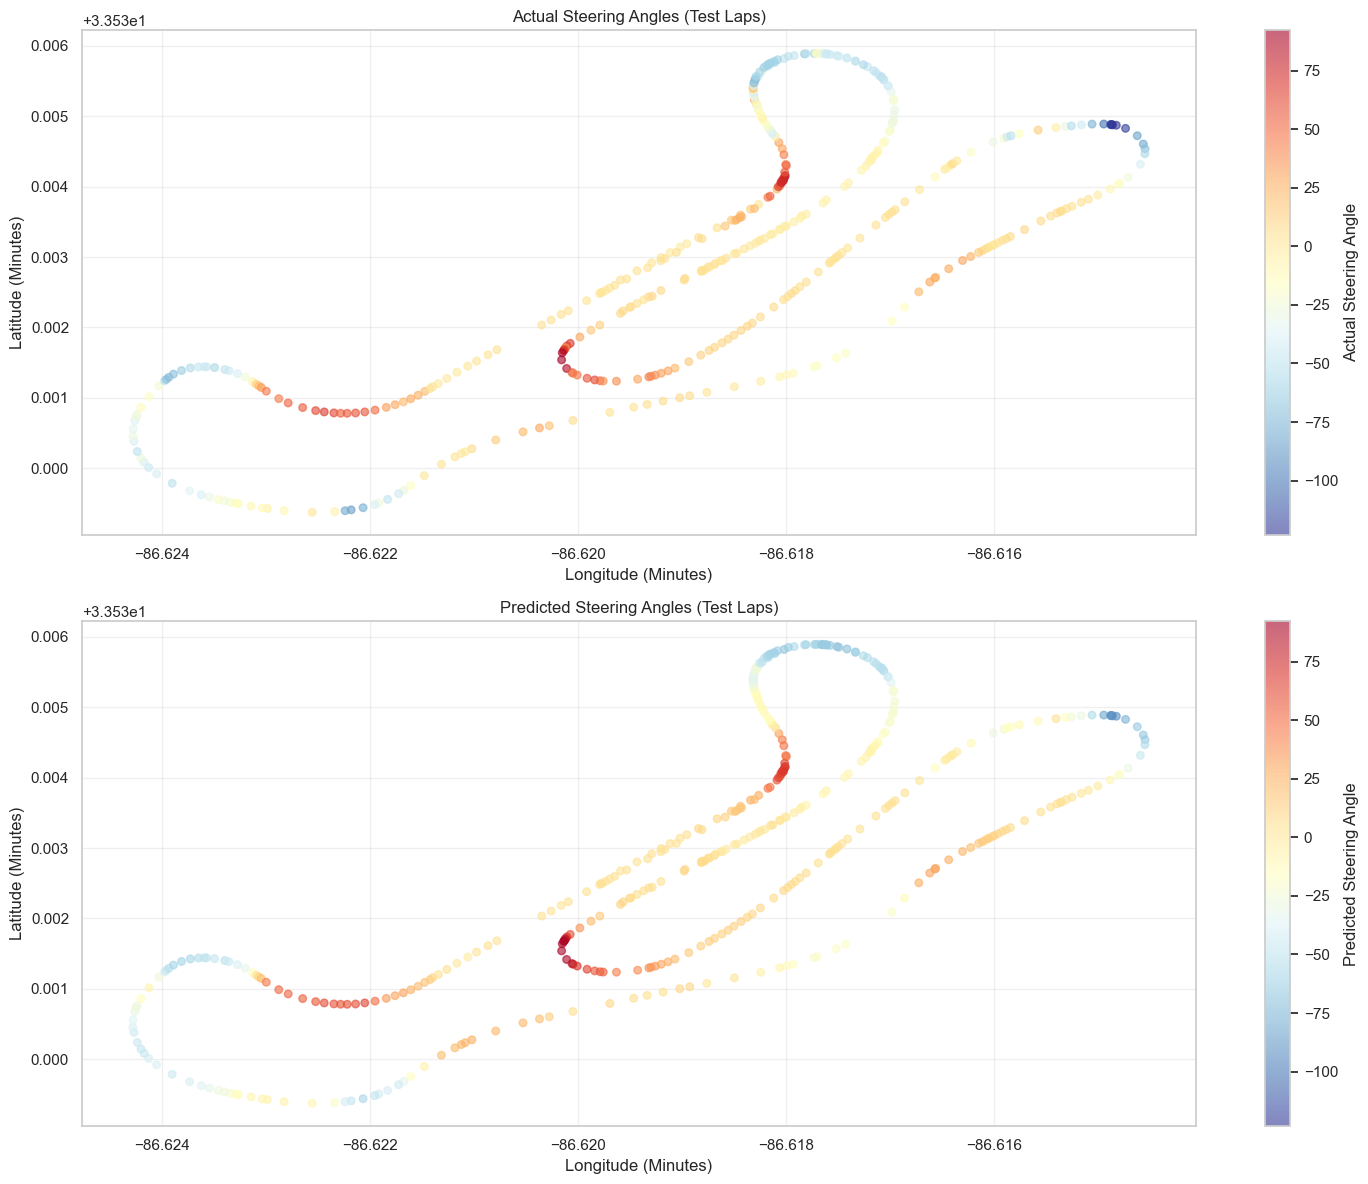


Error Metrics:
Mean Squared Error: 163.39
Root Mean Squared Error: 12.78
Mean Absolute Error: 7.70


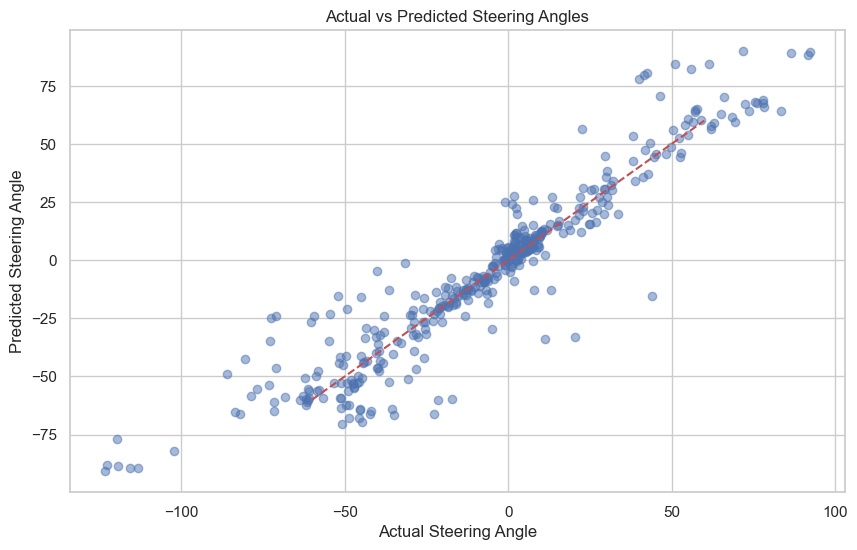

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Select features for prediction (using position and some relevant metrics)
feature_columns = ['VBOX_Lat_Min', 'VBOX_Long_Minutes']

# Prepare X (features) and y (target) for training
X_train = df_train[feature_columns]
y_train = df_train['Steering_Angle']

# Prepare X for testing
X_test = df_test[feature_columns]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
k = int(best_k)  # number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions
predictions = knn.predict(X_test_scaled)

# Add predictions to test dataframe
df_test['pred_steering_angle'] = predictions

# Print some statistics about the predictions
print("Prediction Statistics:")
print(f"Mean predicted steering angle: {predictions.mean():.2f}")
print(f"Min predicted steering angle: {predictions.min():.2f}")
print(f"Max predicted steering angle: {predictions.max():.2f}")

# Create a visualization comparing actual vs predicted steering angles for the test laps
plt.figure(figsize=(15, 10))

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Car path with actual steering angles
scatter1 = ax1.scatter(df_test['VBOX_Long_Minutes'], 
                      df_test['VBOX_Lat_Min'],
                      c=df_test['Steering_Angle'],
                      cmap='RdYlBu_r',
                      s=30,
                      alpha=0.6,
                      label='Actual')

ax1.set_title('Actual Steering Angles (Test Laps)')
ax1.set_xlabel('Longitude (Minutes)')
ax1.set_ylabel('Latitude (Minutes)')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Actual Steering Angle')

# Plot 2: Car path with predicted steering angles
scatter2 = ax2.scatter(df_test['VBOX_Long_Minutes'], 
                      df_test['VBOX_Lat_Min'],
                      c=df_test['pred_steering_angle'],
                      cmap='RdYlBu_r',
                      s=30,
                      alpha=0.6,
                      label='Predicted')

ax2.set_title('Predicted Steering Angles (Test Laps)')
ax2.set_xlabel('Longitude (Minutes)')
ax2.set_ylabel('Latitude (Minutes)')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='Predicted Steering Angle')

# Use same scale for both plots
vmin = min(df_test['Steering_Angle'].min(), df_test['pred_steering_angle'].min())
vmax = max(df_test['Steering_Angle'].max(), df_test['pred_steering_angle'].max())
scatter1.set_clim(vmin, vmax)
scatter2.set_clim(vmin, vmax)

plt.tight_layout()
plt.show()

# Calculate and display error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(df_test['Steering_Angle'], df_test['pred_steering_angle'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_test['Steering_Angle'], df_test['pred_steering_angle'])

print("\nError Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df_test['Steering_Angle'], 
           df_test['pred_steering_angle'], 
           alpha=0.5)
plt.plot([-60, 60], [-60, 60], 'r--')  # Perfect prediction line
plt.xlabel('Actual Steering Angle')
plt.ylabel('Predicted Steering Angle')
plt.title('Actual vs Predicted Steering Angles')
plt.grid(True)
plt.show()